In [1]:
#Importing libraries to perform analysis
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Electric_Vehicle_Charging_Stations_in_New_York.csv")

In [3]:
#get the dataframe columns
cols = df.columns 

#print the columns
print(cols)

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'EV Network', 'EV Network Web', 'Geocode Status',
       'Latitude', 'Longitude', 'Date Last Confirmed', 'ID', 'Updated At',
       'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name',
       'Open Date', 'EV Connector Types'],
      dtype='object')


In [14]:
df.head(5)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types
0,ELEC,JATC LU41,3546 California Rd,JATC LU41,Orchard Park,NY,14127,NaN,888-758-4389,E,...,42.787197,-78.787821,05/27/2020,62127,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,J1772
1,ELEC,GE WattStation,214 3rd St,NaN,Brooklyn,NY,11215,NaN,855-443-3873,E,...,40.675331,-73.988563,05/15/2020,73056,2020-05-15 10:00:11,NaN,NaN,NaN,NaN,J1772
2,ELEC,STATION 1 @ VIL,70 E Main St,VICTOR; In lot next to church,Victor,NY,14564,NaN,888-758-4389,E,...,42.981755,-77.408360,05/27/2020,88701,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,J1772
3,ELEC,CITY OF ITHACA,118 Dryden Rd,DRYDEN; 2nd floor,Ithaca,NY,14850,NaN,888-758-4389,E,...,42.442142,-76.486112,05/27/2020,92327,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,J1772
4,ELEC,LANDING PARK,70 Main St,COEYMANS; -,Coeymans,NY,12045,NaN,888-758-4389,E,...,42.472557,-73.790396,05/27/2020,99993,2020-05-27 09:20:32,NaN,NaN,NaN,NaN,J1772


In [17]:
df1 = df.drop(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'EV Network', 'EV Network Web', 'Date Last Confirmed', 'ID', 'Updated At',
       'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name',
       'Open Date', 'EV Connector Types'], axis=1)

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


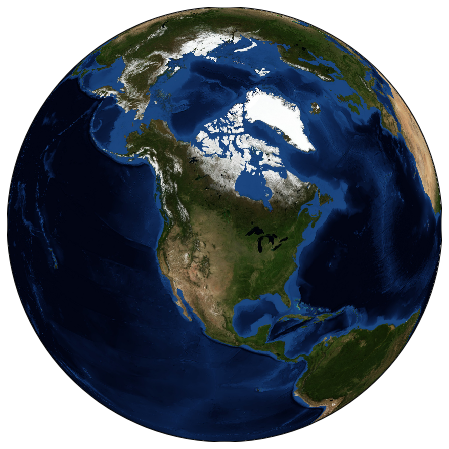

In [6]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


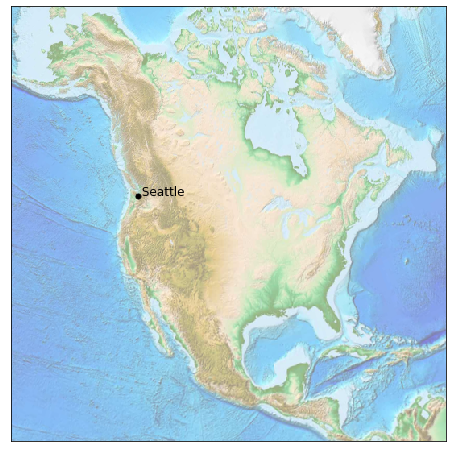

In [7]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [8]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

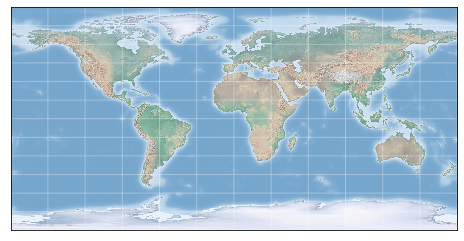

In [9]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

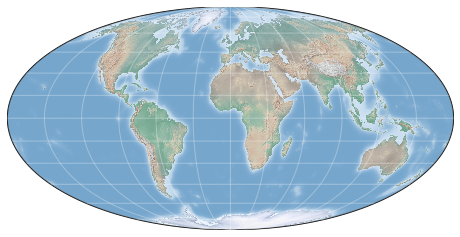

In [10]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

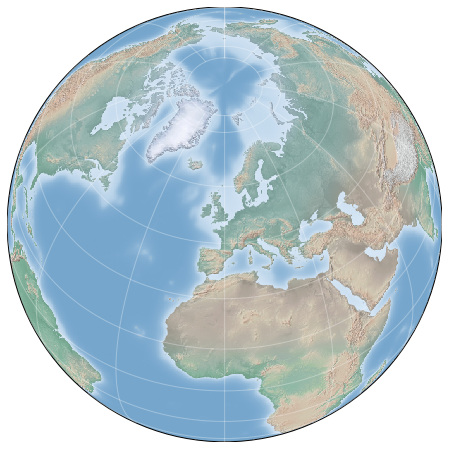

In [11]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

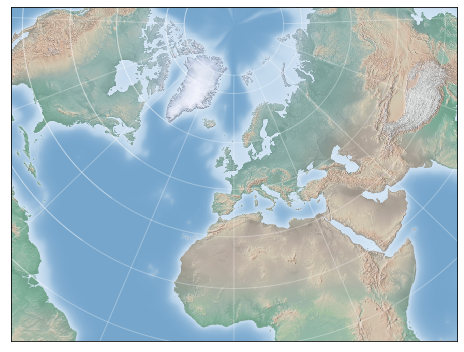

In [12]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

C:\Users\indir\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


OSError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install basemap-data-hires`.

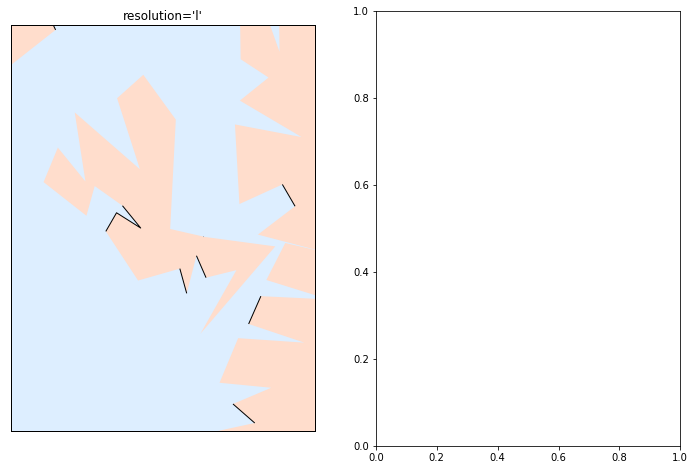

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

In [18]:
df1.head()

,City,Geocode Status,Latitude,Longitude
0,Orchard Park,GPS,42.787197,-78.787821
1,Brooklyn,GPS,40.675331,-73.988563
2,Victor,GPS,42.981755,-77.408360
3,Ithaca,GPS,42.442142,-76.486112
4,Coeymans,GPS,42.472557,-73.790396


In [19]:
import pandas as pd
cities = df1

# Extract the data we're interested in
lat = cities['Latitude'].values
lon = cities['Longitude'].values
city = cities['City'].values
gps = cities['Geocode Status'].values

In [20]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(city), s=gps,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm city})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

C:\Users\indir\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


OSError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install basemap-data-hires`.

<Figure size 576x576 with 0 Axes>